# What is Feature Scaling
- Features means columns name
- Scaling means Number counts of values

Feature scaling is a method to scale numeric features in the same scale or range(like:- 1 to 1, 0 to 1)

1. This last step involves in Data Preprocessing and before ML model training
2. It is also called as data normalization
3. We apply features scaling on independent variable
4. we fit features scaling with train data and transform on train and test data.

#### Why Scaling
Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.

If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

#### Which ML Algorithms Required Feature Scaling?
Those Algorithms Calculate Euclidean distance  through which it do measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally.

- K-Nearest Neighbors (KNN)
- K-Means
- Support Vector Machine (SVM)
- Principal Component Analysis(PCA) :- PCA tries to get the features with maximum variance and the variance is high for high magnitude features. This skews the PCA towards high magnitude features.
- Linear Discriminant Analysis & Naive Bayes are by design equipped to handle this and gives weights to the features accordingly. Performing a features scaling in these algorithms may not have much effect.

**Gradient Descent Based Algorithms** :- This is because θ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.
- Linear Regression,
- Logistic Regression
- Neural Network

#### Tree Based Algorithms not required Feature scaling 
These are not distance based models and can handle varying ranges of features. Hence, Scaling is not required while modelling trees.
- Decision Tree, Random Forest, XGBoost

### Types of Feature Scaling
- 1) Min Max Scaler

- 2) Standard Scaler

- 3) Max Abs Scaler

- 4) Robust Scaler

- 5) Quantile Transformer Scaler

- 6) Power Transformer Scaler

- 7) Unit Vector Scaler

**It can be done by using Standardization vs Normalization**

## What is Standardization?
- Standardization rescale the feature such as mean(μ) = 0 and standard deviation (σ) = 1.
- The result of standardization is Z called as Z-score normalization.
- If data follow a normal distribution (gaussian distribution), Mean would be in Bell Curve. Then will do Standardization.
- If the original distribution is normal, then the standardized distribution will be normal.
- If the original distribution is skewed, then the standardized distribution of the variable will also be skewed.

## What is Normalization?
- Normalization rescale the feature in fixed range between 0 to 1.
- Normalization also called as Min-Max Scaling. Becuase we are finding min value and then max value, then doing calculation.
- If data doesn’t follow normal distribution (Gaussian distribution). means data would be in Skewed format, not in bell curve.

### Standardization  vs Normalization
- There is no any thumb rule to use Standardization or Normalization for special ML algo.

- But mostly Standardization use for clustering analyses, Principal Component Analysis(PCA).

- Normalization prefers for Image processing because of pixel intensity between 0 to 255, neural network algorithm requires data in scale 0-1, K-Nearest Neighbors.

In [1]:
# import libraries
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler # for standardScaler
from sklearn.preprocessing import MinMaxScaler # for normalization
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load inbuild dataset of titanic
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Now we will perform feature scaling on few columns
df2 = df[['survived',"pclass",'age','parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [4]:
# Let check the any missing values
df2.isnull().sum()


survived      0
pclass        0
age         177
parch         0
dtype: int64

In [5]:
# Let's put mean value, as we not dealing with missing concept
df3 = df2.fillna(df2.mean())
df3.isnull().sum()

survived    0
pclass      0
age         0
parch       0
dtype: int64

**Perfect**

Now we need to take X and Y. X for matrix of the independent features and Y is vector for dependent features

In [8]:
X = df3.drop("survived", axis = 1)
Y = df3["survived"]
print('Shape of X = ', X.shape)
print('Shape of y = ', Y.shape)

Shape of X =  (891, 3)
Shape of y =  (891,)


In [11]:
# Let's split the data into Train and Test dataset
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.2, random_state=51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', Y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', Y_test.shape)

Shape of X_train =  (712, 3)
Shape of y_train =  (712,)
Shape of X_test =  (179, 3)
Shape of y_test =  (179,)


## Feature Scaling (Standarlization)


In [12]:
# Now to perform Standard Scaler
# Let's create object of stnadarscaler

sc = StandardScaler()

# let's fit the train data
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
# if we want to see the mean value
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [14]:
# If we want to see the standard Deviation
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [15]:
# Let's check the stastics
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [16]:
# Now let tranform the data into scalled mode
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [17]:
# Let's check the tranformed data
X_train_sc

# but we will get into 2D array format

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [18]:
# Let's take all array in the datafram
X_train_sc =  pd.DataFrame(X_train_sc, columns = ["pclass",'age','parch'])
X_test_sc =  pd.DataFrame(X_test_sc, columns = ["pclass",'age','parch'])

In [19]:
# check tranformed train data
X_train_sc.head()

,pclass,age,parch
0,0.822005,-0.427513,-0.491985
1,0.822005,1.997125,-0.491985
2,0.822005,-1.428157,-0.491985
3,0.822005,-0.889349,-0.491985
4,0.822005,0.011163,2.019080


In [20]:
X_train_sc.describe()

,pclass,age,parch
count,7.120000e+02,7.120000e+02,7.120000e+02
mean,5.270441e-17,1.515642e-16,2.440308e-17
std,1.000703e+00,1.000703e+00,1.000703e+00
min,-1.547500e+00,-2.242528e+00,-4.919855e-01
25%,-6.589356e-01,-5.814583e-01,-4.919855e-01
50%,8.220055e-01,1.116307e-02,-4.919855e-01
75%,8.220055e-01,4.191860e-01,-4.919855e-01
max,8.220055e-01,3.190201e+00,5.785678e+00


**We got this statistics because values is in float with more decimal number, that we couldn't get min value 0. So let's round the value, then will get exact value**


In [21]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


## Feature Scaling (Min-Max Scaler)

In [22]:
# Will do lik same, firstly will create object
mmc = MinMaxScaler()

# Then will fir the train dataset
mmc.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
# Now will tranform the train and test data
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [24]:
# Let' check, we will get 2D array
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [27]:
# Let's take all into DataFrame
X_train_mmc =  pd.DataFrame(X_train_mmc, columns = ["pclass",'age','parch'])
X_test_mmc =  pd.DataFrame(X_test_mmc, columns = ["pclass",'age','parch'])

In [29]:
# now check statiscs
X_train_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


## Let verify changes with PairPlot


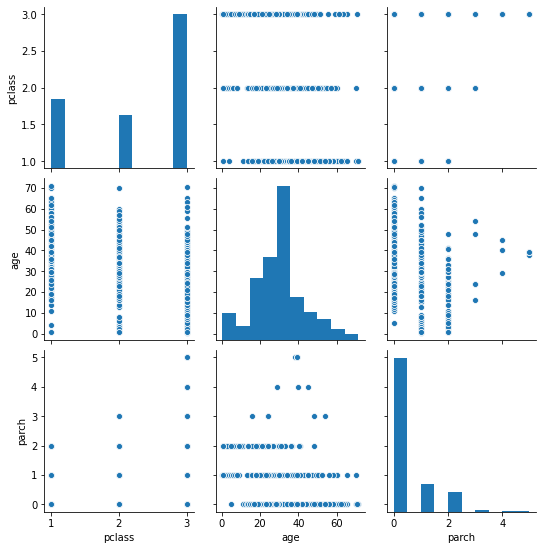

In [30]:
# Let check the original train dataset
sns.pairplot(X_train)

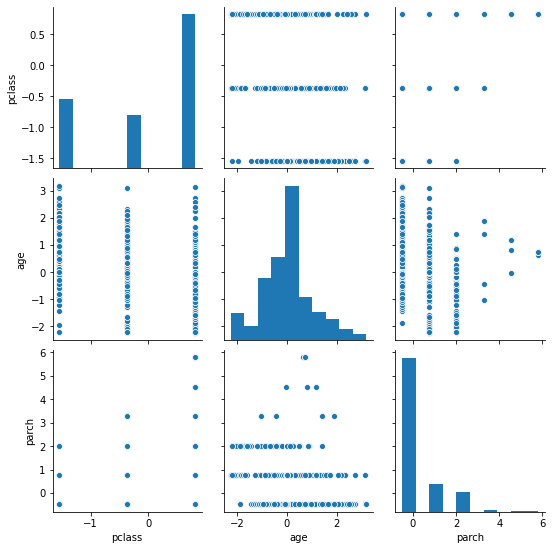

In [31]:
# Let's check of standarlized train data
sns.pairplot(X_train_sc)

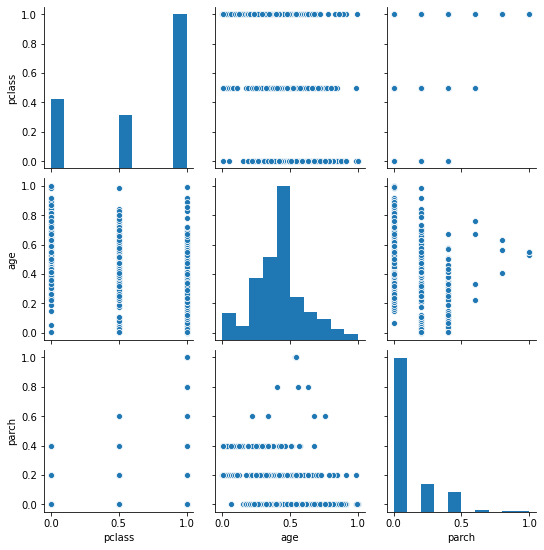

In [32]:
# Let's check the normalized train data
sns.pairplot(X_train_mmc)